In [1]:
import numpy as np
from scipy.stats import norm
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv (r'/Users/sunshaoyang/Desktop/Copy of covid19.csv',index_col=0)

In [3]:
df.isnull().any()

avgtemp         False
avghumidity     False
pop             False
density         False
medianage       False
urbanpop        False
hospibed        False
smokers          True
sexratio        False
gdp2019         False
healthperpop    False
fertility       False
totalcases       True
dtype: bool

In [4]:
# Replace the NAs in "Smokers" with column mean
nan_model=SimpleImputer(missing_values=np.nan,strategy='mean')
df.smokers=nan_model.fit_transform(df[['smokers']])

In [5]:
df.isnull().any()

avgtemp         False
avghumidity     False
pop             False
density         False
medianage       False
urbanpop        False
hospibed        False
smokers         False
sexratio        False
gdp2019         False
healthperpop    False
fertility       False
totalcases       True
dtype: bool

In [6]:
# Delete the country whose totalcases is NA
df.dropna(inplace=True) 

In [7]:
df.isnull().any()

avgtemp         False
avghumidity     False
pop             False
density         False
medianage       False
urbanpop        False
hospibed        False
smokers         False
sexratio        False
gdp2019         False
healthperpop    False
fertility       False
totalcases      False
dtype: bool

In [8]:
df

,avgtemp,avghumidity,pop,density,medianage,urbanpop,hospibed,smokers,sexratio,gdp2019,healthperpop,fertility,totalcases
country,,,,,,,,,,,,,
Afghanistan,6.22,56.93,38928346.0,60.0,18.0,25.0,0.5,22.997685,1.03,18734.0,4.73,5.12,273.0
Albania,13.95,69.90,2877797.0,105.0,36.0,63.0,2.9,29.400000,0.98,15418.0,268.96,1.51,304.0
Algeria,19.57,61.72,43851044.0,18.0,29.0,73.0,1.9,22.997685,1.03,172781.0,23.51,2.70,986.0
Andorra,7.38,75.23,77265.0,164.0,45.0,88.0,2.5,32.500000,1.06,91527.0,76994.76,1.40,439.0
Argentina,32.82,43.62,45195774.0,17.0,32.0,93.0,5.0,23.950000,0.98,445469.0,30.76,2.26,1265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,28.70,55.98,3473730.0,20.0,36.0,96.0,2.8,23.050000,0.94,59918.0,503.21,1.80,369.0
Uzbekistan,13.57,52.05,33469203.0,79.0,28.0,50.0,4.0,13.100000,0.99,60490.0,11.44,1.76,221.0
Venezuela,24.78,79.52,28435940.0,32.0,30.0,80.0,0.8,22.997685,0.99,70140.0,20.36,2.32,146.0


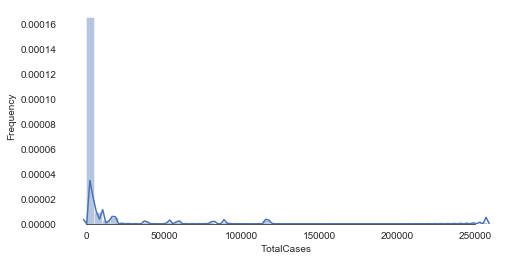

In [47]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 4))
sns.distplot(y,color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="TotalCases")
sns.despine(trim=True, left=True)
plt.show()

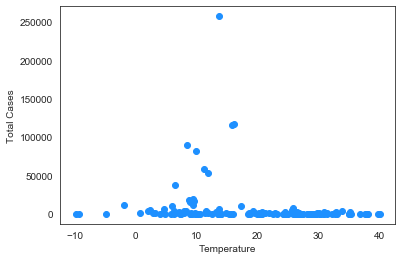

In [62]:
plt.scatter(D,y,color="dodgerblue")
plt.ylabel("Total Cases")
plt.xlabel("Temperature")
plt.show()

In [63]:
(n,p)= df.shape

y = df.totalcases
D = df.iloc[:,0]
Z = df.iloc[:,1:12]
X = df.iloc[:,0:12]

,avghumidity,pop,density,medianage,urbanpop,hospibed,smokers,sexratio,gdp2019,healthperpop,fertility
country,,,,,,,,,,,
Afghanistan,56.93,38928346.0,60.0,18.0,25.0,0.5,22.997685,1.03,18734.0,4.73,5.12
Albania,69.90,2877797.0,105.0,36.0,63.0,2.9,29.400000,0.98,15418.0,268.96,1.51
Algeria,61.72,43851044.0,18.0,29.0,73.0,1.9,22.997685,1.03,172781.0,23.51,2.70
Andorra,75.23,77265.0,164.0,45.0,88.0,2.5,32.500000,1.06,91527.0,76994.76,1.40
Argentina,43.62,45195774.0,17.0,32.0,93.0,5.0,23.950000,0.98,445469.0,30.76,2.26
...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,55.98,3473730.0,20.0,36.0,96.0,2.8,23.050000,0.94,59918.0,503.21,1.80
Uzbekistan,52.05,33469203.0,79.0,28.0,50.0,4.0,13.100000,0.99,60490.0,11.44,1.76
Venezuela,79.52,28435940.0,32.0,30.0,80.0,0.8,22.997685,0.99,70140.0,20.36,2.32


In [10]:
# normalization
muhat1 = np.mean(X,axis = 0)
stdhat1 = np.std(X,axis = 0)
Xtilde = (X - muhat1)/stdhat1

muhat2 = np.mean(Z,axis = 0)
stdhat2 = np.std(Z,axis = 0)
Ztilde = (Z - muhat2)/stdhat2

muhat3 = np.mean(D,axis = 0)
stdhat3 = np.std(D,axis = 0)
Dtilde = (D - muhat3)/stdhat3

In [67]:
# First Lasso
lasso1 = LassoCV(cv = 5,fit_intercept=True)
lasso1.fit(Xtilde,y)
coef1 = lasso1.coef_
gamma_hat = coef1[1:12]
gamma_hat

array([ -614.30057888, -7403.98342233,   862.17448434,  7655.16425717,
        -555.76899919, -5531.07832856,     0.        ,  -599.48092159,
       26480.03130353, -1198.50883468,  2866.73279392])

In [23]:
# Second Lasso
lasso2 = LassoCV(cv = 5)
lasso2.fit(Ztilde,D)
coef2 = lasso2.coef_
phi_hat = coef2
phi_hat

array([-1.9206395 , -0.04899025,  1.12606156, -3.53951066, -0.        ,
       -2.71732008, -1.12509304,  0.        , -0.12798112, -0.        ,
        0.        ])

In [24]:
# Use analogy principle to estimate alpha

# Calculate numerator of alpha_tilde
a = y - np.dot(Ztilde,gamma_hat)
b = Dtilde - np.dot(Ztilde,phi_hat)
c = np.dot(a,b)

# Calculate dominator of alpha_tilde
d = np.dot(Dtilde,b)

In [25]:
# Calculate alpha_tilde
alpha_tilde = c/d
alpha_tilde

-959.3110754734498

In [26]:
y_predict = lasso1.predict(Xtilde)
epsilon = y - y_predict

y_predict = lasso2.predict(Ztilde)
mu = y - y_predict

In [27]:
Sigma = (np.dot(epsilon**2,mu**2)/n)/((np.dot(mu,mu)/n)**2)
Sigma  # So the distributio of alpha is N(0,2.4692)

2.469228503185719

In [28]:
#Confidence Interval
1.96*np.sqrt(Sigma/n)
d = alpha_tilde - 1.96*np.sqrt(Sigma/n)
u = alpha_tilde + 1.96*np.sqrt(Sigma/n)
print(d,u)

-959.5686297072367 -959.0535212396629


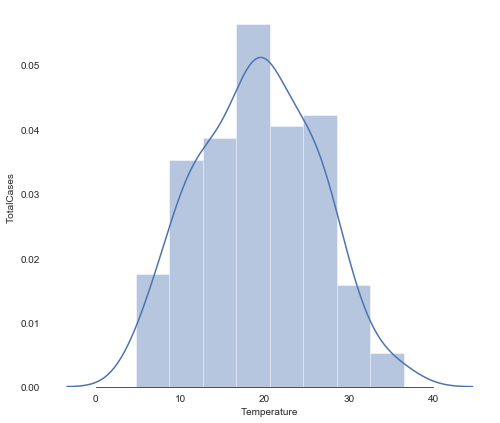

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
sns.distplot(y_predict,color="b");
ax.xaxis.grid(False)
ax.set(ylabel="TotalCases")
ax.set(xlabel="Temperature")
sns.despine(trim=True, left=True)
plt.show()